# Import Package

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker

# Call files

In [177]:
user_behavior = pd.read_csv('user_behavior_modified.csv', low_memory=False)
wordcount_first_last_dates = pd.read_csv('wordcount_first_last_dates.csv', low_memory=False)
hero_game_mission_history = pd.read_csv('files/hero_game_mission_history.csv', low_memory=False)
app_user_created_at = pd.read_csv('files/app_user_created_at.csv', low_memory=False)
battle_7day = pd.read_csv('temp_file/battle count in 7 days.csv', low_memory=False)
battle_1day = pd.read_csv('temp_file/battle on first day.csv', low_memory=False)
user_bin_payment = pd.read_csv('user_bin_payment.csv', low_memory=False)
user_streaks_in_30days = pd.read_csv('temp_file/user streak in 30 days.csv', low_memory=False)
word_count_in_7days = pd.read_csv('temp_file/word count in 7 days.csv', low_memory=False)
word_count_on_first_day = pd.read_csv('temp_file/word count on first day.csv', low_memory=False)
mission_count_in_7days = pd.read_csv('temp_file/mission count in 7 days.csv', low_memory=False)
mission_completed_count_in_7days = pd.read_csv('temp_file/mission completed count in 7 days.csv', low_memory=False)
file_create_first_day = pd.read_csv('temp_file/file count on first day.csv', low_memory=False)
file_create_7_days = pd.read_csv('temp_file/file count in 7 days.csv', low_memory=False)
wardrobe_updated = pd.read_csv('temp_file/wardrobe updated.csv', low_memory=False)
max_streak_30days = pd.read_csv('temp_file/max streak in 30 days.csv', low_memory=False)

# Define

In [178]:
# Group the DataFrame by 'paid_user' and calculate the sum of the specified feature for each group
def compare_sum(df, column_name, file_name):
    # Calculate the sum of the specified column for each value of "paid_user"
    sums = df.groupby('paid_user')[column_name].sum()

    # Create a bar graph
    plt.bar(sums.index, sums.values, width=0.6, color='#903794')
    plt.xlabel('User')
    plt.ylabel('Total ' + column_name)
    plt.title('Total ' + column_name + ' by User')
    plt.xticks(sums.index, ['Non Paid', 'Paid'])  # Optional: Set custom labels for x-axis
    
    # Save the chart to a specific file
    file_path = f"/Users/chingyuhsieh/test/Dissertation/graphs/{file_name}.png"
    plt.savefig(file_path)
    
    plt.show()

#Merge with user_bin_payment_idhero
def merge_dataframes_idhero(left_df):
    merged_df = left_df.merge(user_bin_payment, on='idhero', how='left')
    merged_df = merged_df[merged_df['paid_user'] == 1]
    return merged_df

#Merge with user_bin_payment_iduser
def merge_dataframes_iduser(left_df):
    merged_df = left_df.merge(user_bin_payment, on='iduser', how='left')
    merged_df = merged_df[merged_df['paid_user'] == 1]
    return merged_df







# Paid user highest streak 

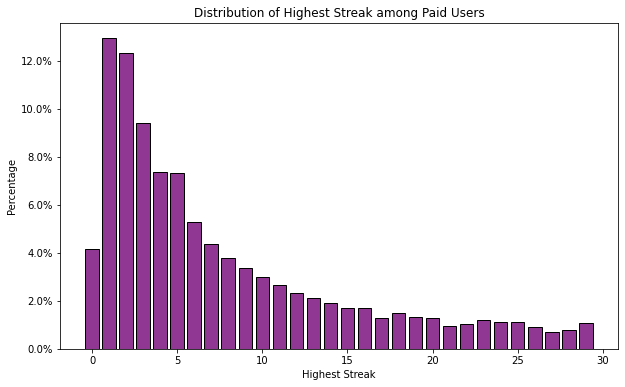

In [179]:
# Filter the DataFrame to select only rows where paid_user = 1 and highest_streak < 30
paid_streak = user_behavior[(user_behavior['paid_user'] == 1) & (user_behavior['highest_streak'] < 30)]

# Get the counts for each 'highest_streak' value
counts = paid_streak['highest_streak'].value_counts()

# Sort the 'highest_streak' values in ascending order
counts = counts.sort_index()

# Calculate the percentage of each count
total_counts = counts.sum()
percentages = (counts / total_counts) * 100

# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting a bar chart to visualize the distribution of highest_streak
plt.bar(counts.index, percentages, color='#903794', edgecolor='black')

# Set the title and labels for the plot
plt.title('Distribution of Highest Streak among Paid Users')
plt.xlabel('Highest Streak')
plt.ylabel('Percentage')

# Add '%' symbol beside each number on the y-axis
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

#save file
#plt.savefig('/Users/chingyuhsieh/test/Dissertation/graphs/streak_non_paid_<30.png')

# Save the plot as an image
save_path = '/Users/chingyuhsieh/test/Dissertation/graph_hypothethis/streak_paid<30.png'
plt.savefig(save_path)

# Display the plot
plt.show()

# Paid user wordrobe

# Hero_battle

## Describe of paid user battle count in the first day

In [180]:
battle_1day_payment = merge_dataframes_idhero(battle_1day)
battle_1day_payment

,idhero,battle_1,iduser,paid_user
0,28,4,28,1
2,922,2,922,1
3,937,1,937,1
4,978,1,978,1
5,1192,1,1192,1
...,...,...,...,...
22195,51210,9,49939,1
22224,51243,17,49972,1
22244,51265,22,49994,1
22256,51278,8,50007,1


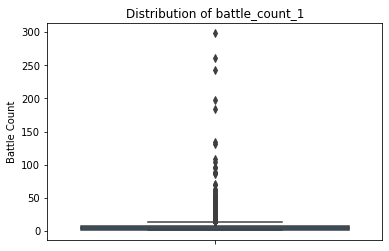

In [181]:
# Create a box plot to visualize the distribution of battle_count
sns.boxplot(data=battle_1day_payment, y='battle_1')

# Set the plot title and labels
plt.title('Distribution of battle_count_1')
plt.ylabel('Battle Count')

# Save the plot as an image
save_path = '/Users/chingyuhsieh/test/Dissertation/graph_hypothethis/Distribution of battle_count_1.png'
plt.savefig(save_path)

# Show the plot
plt.show()

In [182]:
battle_1day_payment = battle_1day_payment[['battle_1']]
battle_1day_payment.describe().round(2)

,battle_1
count,5818.00
mean,6.47
std,10.28
min,1.00
25%,2.00
50%,4.00
75%,7.00
max,299.00


## Describe of paid user battle count in first 7 days

In [183]:
battle_7day_payment = merge_dataframes_idhero(battle_7day)
battle_7day_payment

,idhero,battle_count,iduser,paid_user
0,28,4,28,1
3,834,1,834,1
4,922,9,922,1
5,937,15,937,1
6,978,8,978,1
...,...,...,...,...
27277,51210,123,49939,1
27306,51243,100,49972,1
27326,51265,84,49994,1
27338,51278,68,50007,1


In [184]:
battle_7day_payment = battle_7day_payment[['battle_count']]

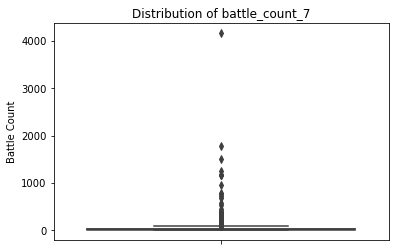

In [185]:
# Create a box plot to visualize the distribution of battle_count
sns.boxplot(data=battle_7day_payment, y='battle_count')

# Set the plot title and labels
plt.title('Distribution of battle_count_7')
plt.ylabel('Battle Count')

# Save the plot as an image
save_path = '/Users/chingyuhsieh/test/Dissertation/graph_hypothethis/Distribution of battle_count_7.png'
plt.savefig(save_path)

# Show the plot
plt.show()

In [186]:
battle_7day_payment.describe().round(2)

,battle_count
count,7412.00
mean,33.02
std,74.24
min,1.00
25%,9.00
50%,21.00
75%,40.00
max,4173.00


# Paid user word count

## Describe of paid user word count on first day

In [187]:
word_first_day_payment = merge_dataframes_iduser(word_count_on_first_day)
word_first_day_payment

,iduser,words,user_create,word_create,idhero,paid_user
1,24369,740,2019-10-21,2019-10-21,25636,1
4,28,1546,2016-05-16,2016-05-16,28,1
5,46354,803,2022-11-20,2022-11-20,47625,1
8,23402,1182,2019-08-19,2019-08-19,24669,1
13,46024,756,2022-11-11,2022-11-11,47295,1
...,...,...,...,...,...,...
27252,49939,2331,2023-04-16,2023-04-16,51210,1
27282,49972,4869,2023-04-17,2023-04-17,51243,1
27301,49994,5253,2023-04-17,2023-04-17,51265,1
27313,50007,2564,2023-04-17,2023-04-17,51278,1


In [188]:
# Count the number of occurrences of each 'iduser'
duplicate_counts = word_first_day_payment['iduser'].value_counts()

# Filter out the IDs that have more than one occurrence
duplicates = duplicate_counts[duplicate_counts > 1]

# Check if any duplicates exist
if len(duplicates) > 0:
    print("Duplicate 'iduser' values found:")
    print(duplicates)
else:
    print("No duplicate 'iduser' values found.")

No duplicate 'iduser' values found.


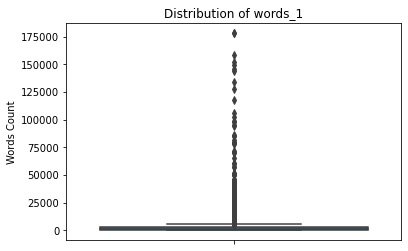

In [189]:
# Create a box plot to visualize the distribution of words
sns.boxplot(data=word_first_day_payment, y='words')

# Set the plot title and labels
plt.title('Distribution of words_1')
plt.ylabel('Words Count')


# Save the plot as an image
save_path = '/Users/chingyuhsieh/test/Dissertation/graph_hypothethis/Distribution of words_1.png'
plt.savefig(save_path)



# Show the plot
plt.show()

In [220]:
# Calculate summary statistics and round to two decimal places
column_description = word_first_day_payment['words'].describe().round(2)

# Convert the result to a DataFrame
column_description_df = pd.DataFrame(column_description)

# Display the DataFrame
column_description_df


,words
count,6464.00
mean,3010.33
std,8555.01
min,0.00
25%,544.00
50%,1295.00
75%,2742.00
max,178690.00


## Describe of paid user word count in 7 days

In [191]:
word_count_in_7days_payment = merge_dataframes_iduser(word_count_in_7days)
word_count_in_7days_payment

,iduser,words,user_create,word_create,idhero,paid_user
0,28032,2257,2020-03-22,2020-03-23,29299,1
1,28032,914,2020-03-22,2020-03-24,29299,1
2,28032,1156,2020-03-22,2020-03-25,29299,1
3,28032,493,2020-03-22,2020-03-26,29299,1
4,28032,680,2020-03-22,2020-03-27,29299,1
...,...,...,...,...,...,...
100998,50202,480,2023-04-22,2023-04-25,51473,1
100999,50202,0,2023-04-22,2023-04-26,51473,1
101000,50202,708,2023-04-22,2023-04-27,51473,1
101001,50202,723,2023-04-22,2023-04-28,51473,1


In [222]:
# Group by iduser and sum the words values
df_sum = word_count_in_7days_payment.groupby('iduser')['words'].sum().reset_index()

# Display the resulting table with only iduser and word_create columns
word_count_in_7days_sum = df_sum[['iduser','words']]
word_count_in_7days_sum

,iduser,words
0,28,1877
1,579,415
2,834,1277
3,922,4687
4,937,10519
...,...,...
7580,49939,83065
7581,49972,42725
7582,49994,26504
7583,50007,18239


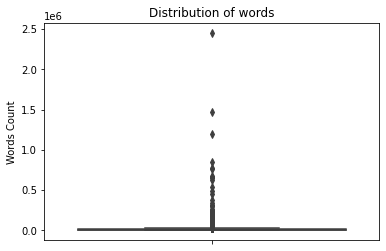

In [193]:
# Create a box plot to visualize the distribution of words
sns.boxplot(data=word_count_in_7days_sum, y='words')

# Set the plot title and labels
plt.title('Distribution of words')
plt.ylabel('Words Count')


# Save the plot as an image
save_path = '/Users/chingyuhsieh/test/Dissertation/graph_hypothethis/Distribution of words_7.png'
plt.savefig(save_path)



# Show the plot
plt.show()

In [194]:
word_count_in_7days_sum = word_count_in_7days_sum[['words']]
word_count_in_7days_sum.describe().round(2)

,words
count,7585.00
mean,14799.99
std,47066.21
min,0.00
25%,3385.00
50%,8140.00
75%,16011.00
max,2453529.00


## Mission count in 7 days

In [195]:
mission_count_in_7days_payment = merge_dataframes_idhero(mission_count_in_7days)
mission_count_in_7days_payment

,idhero,mission_count,iduser,paid_user
2,18892,5,17625,1
3,18893,2,17626,1
5,18909,8,17642,1
13,18930,1,17663,1
16,18942,3,17675,1
...,...,...,...,...
9486,51210,8,49939,1
9507,51243,30,49972,1
9523,51265,39,49994,1
9531,51278,16,50007,1


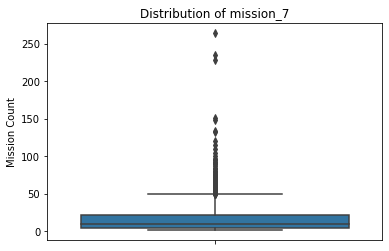

In [196]:
# Create a box plot to visualize the distribution of words
sns.boxplot(data= mission_count_in_7days_payment, y='mission_count')

# Set the plot title and labels
plt.title('Distribution of mission_7')
plt.ylabel('Mission Count')


# Save the plot as an image
save_path = '/Users/chingyuhsieh/test/Dissertation/graph_hypothethis/Distribution of mission_7.png'
plt.savefig(save_path)



# Show the plot
plt.show()

In [197]:


# Display the resulting table with only iduser and word_create columns
mission_count_in_7days = mission_count_in_7days_payment[['mission_count']]
mission_count_in_7days

,mission_count
2,5
3,2
5,8
13,1
16,3
...,...
9486,8
9507,30
9523,39
9531,16


In [198]:
mission_count_in_7days.describe().round(2)

,mission_count
count,4266.00
mean,15.22
std,16.42
min,1.00
25%,4.00
50%,10.00
75%,22.00
max,265.00


## Mission completed in 7 days

In [199]:
mission_completed_count_in_7days_payment = merge_dataframes_idhero(mission_completed_count_in_7days)
mission_completed_count_in_7days_payment

,idhero,mission_completed_count,iduser,paid_user
2,18892,5,17625,1
3,18893,2,17626,1
5,18909,8,17642,1
13,18930,1,17663,1
16,18942,3,17675,1
...,...,...,...,...
9390,51210,8,49939,1
9411,51243,30,49972,1
9427,51265,39,49994,1
9435,51278,16,50007,1


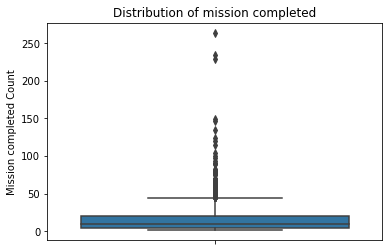

In [200]:
# Create a box plot to visualize the distribution of words
sns.boxplot(data= mission_completed_count_in_7days_payment, y='mission_completed_count')

# Set the plot title and labels
plt.title('Distribution of mission completed')
plt.ylabel('Mission completed Count')

# Save the plot as an image
save_path = '/Users/chingyuhsieh/test/Dissertation/graph_hypothethis/Distribution of mission completed_7.png'
plt.savefig(save_path)


# Show the plot
plt.show()

In [201]:

# Display the resulting table with only iduser and word_create columns
mission_completed_count_in_7days = mission_completed_count_in_7days_payment[['idhero','mission_completed_count']]
mission_completed_count_in_7days

,idhero,mission_completed_count
2,18892,5
3,18893,2
5,18909,8
13,18930,1
16,18942,3
...,...,...
9390,51210,8
9411,51243,30
9427,51265,39
9435,51278,16


In [223]:
import pandas as pd

# Calculate summary statistics and round to two decimal places
mission_completed_count_in_7days_stats = mission_completed_count_in_7days['mission_completed_count'].describe().round(2)

# Convert the result to a DataFrame
mission_completed_count_in_7days_stats_df = pd.DataFrame(mission_completed_count_in_7days_stats)

# Display the DataFrame
mission_completed_count_in_7days_stats_df


,mission_completed_count
count,4253.00
mean,13.95
std,15.32
min,1.00
25%,4.00
50%,9.00
75%,20.00
max,264.00


## File count first day

In [203]:
file_count_first_day_payment = merge_dataframes_iduser(file_create_first_day)
file_count_first_day_payment

,iduser,file_count,idhero,paid_user
0,28,2,28,1
1,579,2,579,1
3,937,1,937,1
4,2027,1,2027,1
7,2586,1,2586,1
...,...,...,...,...
43862,49939,3,51210,1
43894,49972,9,51243,1
43916,49994,2,51265,1
43928,50007,1,51278,1


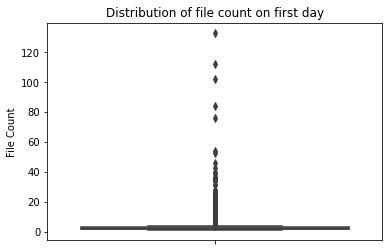

In [204]:
# Create a box plot to visualize the distribution of words
sns.boxplot(data= file_count_first_day_payment, y='file_count')

# Set the plot title and labels
plt.title('Distribution of file count on first day')
plt.ylabel('File Count')

# Save the plot as an image
save_path = '/Users/chingyuhsieh/test/Dissertation/graph_hypothethis/Distribution of file count_1.png'
plt.savefig(save_path)


# Show the plot
plt.show()

In [205]:
# Display the resulting table with only iduser and file_count columns
file_count_first_day_payment = file_count_first_day_payment[['file_count']]
file_count_first_day_payment.describe().round(2)

,file_count
count,7639.00
mean,2.85
std,3.82
min,1.00
25%,2.00
50%,2.00
75%,3.00
max,133.00


## File create in 7 days

In [206]:
file_count_7_days_payment = merge_dataframes_iduser(file_create_7_days)
file_count_7_days_payment

,iduser,file_count,idhero,paid_user
0,28,5,28,1
1,579,2,579,1
4,834,4,834,1
5,922,6,922,1
6,937,6,937,1
...,...,...,...,...
44408,49939,42,51210,1
44440,49972,32,51243,1
44462,49994,4,51265,1
44474,50007,2,51278,1


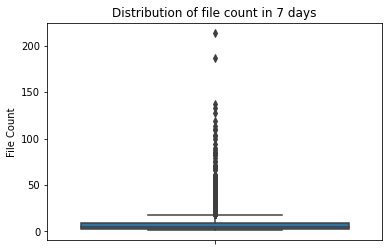

In [207]:
# Create a box plot to visualize the distribution of words
sns.boxplot(data= file_count_7_days_payment, y='file_count')

# Set the plot title and labels
plt.title('Distribution of file count in 7 days')
plt.ylabel('File Count')

# Save the plot as an image
save_path = '/Users/chingyuhsieh/test/Dissertation/graph_hypothethis/Distribution of file count_7.png'
plt.savefig(save_path)

# Show the plot
plt.show()

In [208]:
# Display the resulting table with only iduser and file_count columns
file_count_7_days_payment = file_count_7_days_payment[['file_count']]
file_count_7_days_payment.describe().round(2)

,file_count
count,7893.00
mean,7.43
std,9.25
min,1.00
25%,3.00
50%,5.00
75%,9.00
max,214.00


## wordrobe updated

In [228]:
#merge with app_behaviour to have the binary of updated or not for all user

# Perform a left join on the selected columns
wardrobe_updated_merge = pd.merge(user_behavior['iduser'], wardrobe_updated[['iduser', 'wardrobe_updated']], on='iduser', how='left')
# fill NaN to zero
wardrobe_updated_merge.fillna(0, inplace=True)
#change type to int
wardrobe_updated_merge = wardrobe_updated_merge.astype(int)

# #select only wardrobe_updated = 1 
# wardrobe_updated_merge = wardrobe_updated_merge[wardrobe_updated_merge['wardrobe_updated'] == 1]
# wardrobe_updated_merge

In [229]:
wardrobe_updated_merge_payment = merge_dataframes_iduser(wardrobe_updated_merge)
wardrobe_updated_merge_payment

,iduser,wardrobe_updated,idhero,paid_user
0,1,0,1,1
1,28032,0,29299,1
4,24369,1,25636,1
9,28,1,28,1
55,81,1,3850,1
...,...,...,...,...
48403,49939,1,51210,1
48436,49972,0,51243,1
48457,49994,1,51265,1
48469,50007,1,51278,1


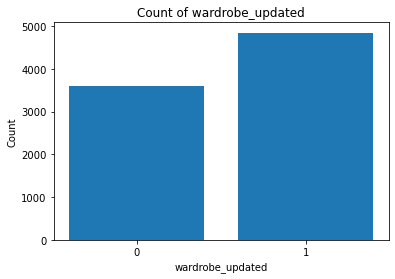

In [234]:
import matplotlib.pyplot as plt

# Count the occurrences of wardrobe_updated values
wardrobe_counts = wardrobe_updated_merge_payment['wardrobe_updated'].value_counts()

# Create a bar plot
plt.bar(wardrobe_counts.index, wardrobe_counts.values)

# Set the plot title and labels
plt.title('Count of wardrobe_updated')
plt.xlabel('wardrobe_updated')
plt.ylabel('Count')

# Set x-axis tick labels
plt.xticks([0, 1])

# Save the plot as an image
save_path = '/Users/chingyuhsieh/test/Dissertation/graph_hypothethis/count_of_wardrobe_updated.png'
plt.savefig(save_path)

# Show the plot
plt.show()



## Max streak in 30 days

In [211]:
max_streak_30days_payment = merge_dataframes_iduser(max_streak_30days)
max_streak_30days_payment

,iduser,end_date,created_at,count,idhero,paid_user
16,2883,2016-09-22,2016-09-22 23:48:17,1,2880,1
25,2964,2016-10-05,2016-10-05 01:57:49,1,2963,1
56,3221,2016-10-25,2016-10-23 18:58:14,1,3218,1
67,3293,2016-10-26,2016-10-26 08:39:27,1,3289,1
112,3557,2016-11-05,2016-11-01 14:09:55,1,3551,1
...,...,...,...,...,...,...
17682,43902,2022-09-25,2022-08-27 10:45:47,30,45173,1
17684,45330,2022-11-30,2022-11-01 13:02:47,30,46601,1
17685,45784,2022-12-05,2022-11-06 18:48:45,30,47055,1
17692,47669,2023-02-17,2023-01-19 18:41:59,30,48940,1


In [212]:
# Display the resulting table with only iduser and file_count columns
max_streak_30days_payment = max_streak_30days_payment[['count']]
max_streak_30days_payment

,count
16,1
25,1
56,1
67,1
112,1
...,...
17682,30
17684,30
17685,30
17692,30


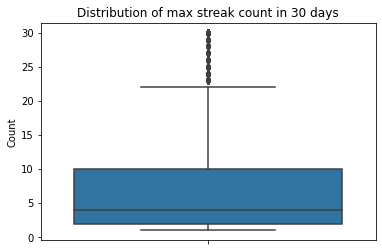

In [213]:
# Create a box plot to visualize the distribution of words
sns.boxplot(data= max_streak_30days_payment, y='count')

# Set the plot title and labels
plt.title('Distribution of max streak count in 30 days')
plt.ylabel('Count')

# Save the plot as an image
save_path = '/Users/chingyuhsieh/test/Dissertation/graph_hypothethis/Distribution of max streak count in 30 days.png'
plt.savefig(save_path)

# Show the plot
plt.show()

In [214]:
max_streak_30days_payment.describe().round(2)

,count
count,2206.00
mean,7.26
std,7.21
min,1.00
25%,2.00
50%,4.00
75%,10.00
max,30.00
